In [3]:
#Script to obtain data 
from helpers import *
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import keras
from keras import models
from keras import layers
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb



In [5]:
df = pd.read_csv("/home/akshat/Downloads/data_moods.csv")
df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.19600,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
1,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.00000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
2,13th of January,Sleep Talk,Patricia Lalor,1qolVx4UYCFfccC10wFG0x,2020-04-10,16,180800,0.574,0.90500,0.247,0.03230,0.1130,0.212,-15.250,0.0282,115.102,2,4,Calm
3,2 The Brain,2 The Brain,ACRAZE,1sR0NZ42EGY6bW2lidiC45,2021-01-14,44,205844,0.517,0.30500,0.725,0.24200,0.0870,0.161,-3.038,0.0428,140.229,1,3,Energetic
4,2U (feat. Justin Bieber) - Seeb Remix,2U (feat. Justin Bieber) [Seeb Remix],David Guetta,7N118VYdB5NbtnDhsmmndA,2017-09-08,42,214812,0.639,0.14100,0.735,0.00000,0.1700,0.578,-4.948,0.0937,139.984,8,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,"You're Gonna Go Far, Kid",21 Alt Rock Anthems,Various Artists,7oypoJJHZOALqQlGKpTefk,2014-07-22,0,178333,0.547,0.00485,0.877,0.00000,0.2470,0.611,-5.135,0.0658,126.083,9,4,Energetic
932,You're My Best Friend - Remastered 2011,Queen 40 Limited Edition Collector's Box Set,Queen,4vEXJ6NvEwS8ptynkNswaa,2011-01-01,57,170800,0.518,0.15800,0.761,0.00765,0.0715,0.576,-7.025,0.0452,118.738,0,4,Happy
933,Young & Sad,THE END OF EVERYTHING,Noah Cyrus,0gySkOOewOdZtHG8stPEB8,2020-05-15,65,190182,0.618,0.59200,0.428,0.00000,0.1920,0.359,-8.500,0.0380,142.021,7,4,Sad
934,Your Turn Now,Your Turn Now,Aaron Smith,6Ij1Soe86rp6D9YsxwCz9N,2020-07-10,49,239500,0.634,0.81900,0.193,0.00000,0.1130,0.159,-9.503,0.0277,95.004,7,4,Sad


In [6]:
col_features = df.columns[6:-3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

In [7]:
#Encodethe categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
2,Calm,0
3,Energetic,1
1,Happy,2
0,Sad,3


In [252]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(11,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [245]:
def base_model2():
    model2 = models.Sequential()
    model2.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

    model2.add(layers.Dense(128, activation='relu'))

    model2.add(layers.Dense(64, activation='relu'))
    
    model2.add(layers.Dense(32, activation='relu'))
    
    model2.add(layers.Dense(16, activation='relu'))

    model2.add(layers.Dense(4, activation='softmax'))

    model2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model2

In [17]:
X_train.shape[1]

10

In [253]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=800,batch_size=200,verbose=0)
estimator2 = RandomForestClassifier(n_estimators=500)
estimator3 = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.05)
# estimator4 = KNeighborsClassifier()
# estimator5 = GaussianNB()
# estimator6 = SVC(C=1, gamma=0.1)
# estimator7 = DecisionTreeClassifier()


In [263]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print(results.max())
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

0.7379679083824158
Baseline: 70.73% (1.58%)


In [264]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)

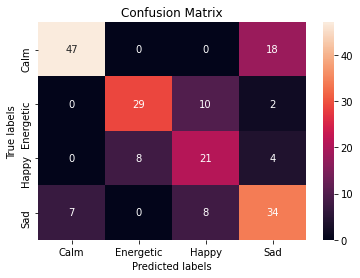

Accuracy Score 0.6968085106382979


In [265]:
cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [254]:
def predict_mood(id_song):
    #Join the model and the scaler in a Pipeline
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
                                                                             batch_size=200,verbose=0))])
    #Fit the Pipeline
    pip.fit(X2,encoded_y)

    #Obtain the features of the song
    preds = get_songs_features(id_song)
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    name_song = preds[0][0]
    artist = preds[0][2]

    return print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
    #print(f"{name_song} by {artist} is a {mood[0].upper()} song")



In [15]:
def getTrackId(trackName,artistName):
    artist = artistName
    title = trackName
    results = sp.search(q='artist:' + artist + ' track:' + title, type='track')
    trackId = results['tracks']['items'][0]['id']
    print(trackId)
    return trackId

In [16]:
    trackName = 'Before You Go'
    artistName = 'Lewis Capaldi'
    trackId = getTrackId(trackName,artistName)

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


2gMXnyrvIjhVBUZwvLZDMP


In [12]:
artist = 'Lewis Capaldi '
title = 'Before You Go'
results = sp.search(q='artist:' + artist + ' track:' + title, type='track')
trackId = results['tracks']['items'][0]['id']
trackId

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


'2gMXnyrvIjhVBUZwvLZDMP'

In [262]:
predict_mood(trackId)

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


Ramenez la coupe à la maison by Various Artists is a HAPPY song
